In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, median_absolute_error,
                             r2_score, explained_variance_score)

# 📌 1. Veri Setini Yükleme (Latin-1 formatında)
file_path = "/Users/burakbozoglu/Desktop/hidrojen_motoru_veri_seti.csv"
df = pd.read_csv(file_path, encoding="latin1")

# 📌 2. Eksik Verileri Kontrol Etme
print("Eksik Veri Sayısı:\n", df.isnull().sum())

# 📌 3. Bağımsız ve Bağımlı Değişkenleri Belirleme
target_column = "Verimlilik Skoru"  # Tahmin edilecek sütun

# ✅ Eğer "Verimlilik Skoru" sütunu dosyada yoksa, alternatif bir hedef değişken seç!
if target_column not in df.columns:
    print(f"⚠️ Hata: '{target_column}' sütunu veri setinde bulunamadı!")
    print(f"🔍 Mevcut sütunlar: {list(df.columns)}")
    exit()  # Hata vererek kodu durdur

X = df.drop(columns=[target_column])
y = df[target_column]

# 📌 4. Veri Setini Eğitim ve Test Kümelerine Ayırma (%80 - %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 5. Modeli Eğitme
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 6. Model Tahminleri
y_pred = model.predict(X_test)

# 📌 7. Model Performans Metriklerini Hesaplama
r2 = r2_score(y_test, y_pred)  # R² Skoru
mae = mean_absolute_error(y_test, y_pred)  # Ortalama Mutlak Hata (MAE)
mse = mean_squared_error(y_test, y_pred)  # Ortalama Kare Hata (MSE)
rmse = np.sqrt(mse)  # Karekök Ortalama Kare Hata (RMSE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Ortalama Mutlak Yüzde Hata (MAPE)
medae = median_absolute_error(y_test, y_pred)  # Medyan Mutlak Hata (MedAE)
evs = explained_variance_score(y_test, y_pred)  # Açıklanan Varyans Skoru

# 📌 8. Sonuçları Yazdırma
print(f"✅ R² Skoru: {r2:.4f}")
print(f"✅ MAE (Ortalama Mutlak Hata): {mae:.4f}")
print(f"✅ MSE (Ortalama Kare Hata): {mse:.4f}")
print(f"✅ RMSE (Karekök Ortalama Kare Hata): {rmse:.4f}")
print(f"✅ MAPE (Ortalama Mutlak Yüzde Hata): {mape:.2f}%")
print(f"✅ MedAE (Medyan Mutlak Hata): {medae:.4f}")
print(f"✅ EVS (Açıklanan Varyans Skoru): {evs:.4f}")

# 📌 9. Özellik Önem Skorlarını Görselleştirme
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features, palette="coolwarm")
plt.xlabel("Özellik Önem Skoru")
plt.ylabel("Özellikler")
plt.title("Özellik Önem Sıralaması (Random Forest)")
plt.show()

# 📌 10. Gerçek vs. Tahmin Edilen Değerler Grafiği
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red", linewidth=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs. Tahmin Edilen Değerler")
plt.grid()
plt.show()

# 📌 11. Hata Dağılımı Grafiği (Residual Plot)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.xlabel("Hata (Residual)")
plt.ylabel("Frekans")
plt.title("Hata Dağılımı (Residual Plot)")
plt.show()


In [ ]:
import pandas as pd

# 📌 Dosya yolunu belirtin
file_path = "/Users/burakbozoglu/Desktop/hidrojen_motoru_veri_seti.csv"

# 📌 Farklı encoding türleriyle açmayı deneyelim
try:
    df = pd.read_csv(file_path, encoding="utf-8")
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding="ISO-8859-9")  # Türkçe karakter desteği
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding="latin1")  # Alternatif Latin-1 kodlaması

# 📌 Sütun adlarını elle düzeltme
df.columns = [
    "Yakıt Hücresi Verimi (%)",
    "H2 Tüketimi (g/s)",
    "Çıkış Gücü (kW)",
    "Hücre Sıcaklığı (°C)",
    "Çıkış Voltajı (V)",
    "Hücre Ömrü (Saat)"
]

# 📌 Düzeltilmiş veri setini görüntüleme
print(df.head())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📌 1. Veri Setini Yükleme
df = pd.read_csv("/Users/burakbozoglu/Desktop/hidrojen_motoru_veri_seti.csv")

# 📌 2. Sütun Adlarını Düzenleme
df.columns = [
    "Yakıt Hücresi Verimi (%)", 
    "H2 Tüketimi (g/s)", 
    "Çıkış Gücü (kW)", 
    "Hücre Sıcaklığı (°C)", 
    "Çıkış Voltajı (V)", 
    "Hücre Ömrü (Saat)"
]

# 📌 3. Eksik Verileri Kontrol Etme
print("Eksik Veri Sayısı:\n", df.isnull().sum())

# 📌 4. Bağımsız ve Bağımlı Değişkenleri Belirleme
target_column = "Yakıt Hücresi Verimi (%)"  # Tahmin edilecek sütun
X = df.drop(columns=[target_column])
y = df[target_column]

# 📌 5. Veri Setini Eğitim ve Test Kümelerine Ayırma (%80 - %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 6. Modeli Eğitme
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 7. Model Tahminleri
y_pred = model.predict(X_test)

# 📌 8. Model Performans Metriklerini Hesaplama
r2 = r2_score(y_test, y_pred)  # R² Skoru
mae = mean_absolute_error(y_test, y_pred)  # Ortalama Mutlak Hata (MAE)
mse = mean_squared_error(y_test, y_pred)  # Ortalama Kare Hata (MSE)
rmse = np.sqrt(mse)  # Karekök Ortalama Kare Hata (RMSE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Ortalama Mutlak Yüzde Hata (MAPE)

# 📌 9. Sonuçları Yazdırma
print(f"✅ R² Skoru: {r2:.4f}")
print(f"✅ MAE (Ortalama Mutlak Hata): {mae:.4f}")
print(f"✅ MSE (Ortalama Kare Hata): {mse:.4f}")
print(f"✅ RMSE (Karekök Ortalama Kare Hata): {rmse:.4f}")
print(f"✅ MAPE (Ortalama Mutlak Yüzde Hata): {mape:.2f}%")

# 📌 10. Özellik Önem Skorlarını Görselleştirme
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features, palette="coolwarm")
plt.xlabel("Özellik Önem Skoru")
plt.ylabel("Özellikler")
plt.title("Özellik Önem Sıralaması (Random Forest)")
plt.show()


In [ ]:
import pandas as pd

# 📌 1. Veri Setini Yükleme
df = pd.read_csv("/Users/burakbozoglu/Desktop/hidrojen_motoru_veri_seti.csv", encoding="latin1")

# 📌 2. Sütun Adlarını Düzenleme
df.columns = [
    "Yakıt Hücresi Verimi (%)", 
    "H2 Tüketimi (g/s)", 
    "Çıkış Gücü (kW)", 
    "Hücre Sıcaklığı (°C)", 
    "Çıkış Voltajı (V)", 
    "Hücre Ömrü (Saat)"
]

# 📌 3. İlk 5 Satırı Görüntüleme
print(df.head())

# 📌 4. Güncellenmiş Veri Setini Kaydetme (UTF-8 formatında)
df.to_csv("/Users/burakbozoglu/Desktop/hidrojen_motoru_duzeltilmis.csv", index=False, encoding="utf-8")
print("✅ Düzeltilmiş dosya başarıyla kaydedildi!")



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, median_absolute_error,
                             r2_score, explained_variance_score)

# 📌 1. Veri Setini Yükleme (Latin-1 formatında)
file_path = "/Users/burakbozoglu/Desktop/hidrojen_motoru_veri_seti1.csv"
df = pd.read_csv(file_path, encoding="latin1")

# 📌 2. Sütun Adlarındaki Boşlukları ve Özel Karakterleri Temizleme
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 📌 3. Veri Setini Kontrol Etme
print("Veri Setinin İlk 5 Satırı:\n", df.head())
print("Veri Setindeki Sütunlar:", df.columns)

# 📌 4. Eksik Verileri Kontrol Etme
print("Eksik Veri Sayısı:\n", df.isnull().sum())

# 📌 5. Bağımsız ve Bağımlı Değişkenleri Belirleme
target_column = "Yakit_Hucresi_Verimi_percent"

# Eğer "Yakıt Hücresi Verimi (%)" sütunu dosyada yoksa, alternatif bir hedef değişken seç!
if target_column not in df.columns:
    print(f"⚠️ Hata: '{target_column}' sütunu veri setinde bulunamadı!")
    print(f"🔍 Mevcut sütunlar: {list(df.columns)}")
    exit()  # Hata vererek kodu durdur

X = df.drop(columns=[target_column])
y = df[target_column]

# 📌 6. Veri Setini Eğitim ve Test Kümelerine Ayırma (%80 - %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 7. Modeli Eğitme
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 8. Model Tahminleri
y_pred = model.predict(X_test)

# 📌 9. Model Performans Metriklerini Hesaplama
r2 = r2_score(y_test, y_pred)  # R² Skoru
mae = mean_absolute_error(y_test, y_pred)  # Ortalama Mutlak Hata (MAE)
mse = mean_squared_error(y_test, y_pred)  # Ortalama Kare Hata (MSE)
rmse = np.sqrt(mse)  # Karekök Ortalama Kare Hata (RMSE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Ortalama Mutlak Yüzde Hata (MAPE)
medae = median_absolute_error(y_test, y_pred)  # Medyan Mutlak Hata (MedAE)
evs = explained_variance_score(y_test, y_pred)  # Açıklanan Varyans Skoru

# 📌 10. Sonuçları Yazdırma
print(f"✅ R² Skoru: {r2:.4f}")
print(f"✅ MAE (Ortalama Mutlak Hata): {mae:.4f}")
print(f"✅ MSE (Ortalama Kare Hata): {mse:.4f}")
print(f"✅ RMSE (Karekök Ortalama Kare Hata): {rmse:.4f}")
print(f"✅ MAPE (Ortalama Mutlak Yüzde Hata): {mape:.2f}%")
print(f"✅ MedAE (Medyan Mutlak Hata): {medae:.4f}")
print(f"✅ EVS (Açıklanan Varyans Skoru): {evs:.4f}")

# 📌 11. Özellik Önem Skorlarını Görselleştirme
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features, palette="coolwarm")
plt.xlabel("Özellik Önem Skoru")
plt.ylabel("Özellikler")
plt.title("Özellik Önem Sıralaması (Random Forest)")
plt.show()

# 📌 12. Gerçek vs. Tahmin Edilen Değerler Grafiği
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red", linewidth=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs. Tahmin Edilen Değerler")
plt.grid()
plt.show()

# 📌 13. Hata Dağılımı Grafiği (Residual Plot)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.xlabel("Hata (Residual)")
plt.ylabel("Frekans")
plt.title("Hata Dağılımı (Residual Plot)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, median_absolute_error,
                             r2_score, explained_variance_score)
from sklearn.preprocessing import StandardScaler

# 📌 1. Veri Setini Yükleme (Latin-1 formatında)
file_path = "/Users/burakbozoglu/Desktop/hidrojen_motoru_veri_seti.csv"
df = pd.read_csv(file_path, encoding="latin1")

# 📌 2. Sütun Adlarındaki Boşlukları ve Özel Karakterleri Temizleme
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 📌 3. Veri Setini Kontrol Etme
print("Veri Setinin İlk 5 Satırı:\n", df.head())
print("Veri Setindeki Sütunlar:", df.columns)

# 📌 4. Eksik Verileri Kontrol Etme
print("Eksik Veri Sayısı:\n", df.isnull().sum())

# 📌 5. Bağımsız ve Bağımlı Değişkenleri Belirleme
target_column = "Yakit_Hucresi_Verimi_percent"  # Hedef değişken

# Eğer "Yakit_Hucresi_Verimi_percent" sütunu dosyada yoksa, alternatif bir hedef değişken seç!
if target_column not in df.columns:
    print(f"⚠️ Hata: '{target_column}' sütunu veri setinde bulunamadı!")
    print(f"🔍 Mevcut sütunlar: {list(df.columns)}")
    exit()  # Hata vererek kodu durdur

X = df.drop(columns=[target_column])
y = df[target_column]

# 📌 6. Veri Setini Eğitim ve Test Kümelerine Ayırma (%80 - %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 7. Veriyi Ölçeklendirme (Verinin daha iyi modellemesi için)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 8. Modeli Eğitme
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 9. Model Tahminleri
y_pred = model.predict(X_test)

# 📌 10. Model Performans Metriklerini Hesaplama
r2 = r2_score(y_test, y_pred)  # R² Skoru
mae = mean_absolute_error(y_test, y_pred)  # Ortalama Mutlak Hata (MAE)
mse = mean_squared_error(y_test, y_pred)  # Ortalama Kare Hata (MSE)
rmse = np.sqrt(mse)  # Karekök Ortalama Kare Hata (RMSE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Ortalama Mutlak Yüzde Hata (MAPE)
medae = median_absolute_error(y_test, y_pred)  # Medyan Mutlak Hata (MedAE)
evs = explained_variance_score(y_test, y_pred)  # Açıklanan Varyans Skoru

# 📌 11. Sonuçları Yazdırma
print(f"✅ R² Skoru: {r2:.4f}")
print(f"✅ MAE (Ortalama Mutlak Hata): {mae:.4f}")
print(f"✅ MSE (Ortalama Kare Hata): {mse:.4f}")
print(f"✅ RMSE (Karekök Ortalama Kare Hata): {rmse:.4f}")
print(f"✅ MAPE (Ortalama Mutlak Yüzde Hata): {mape:.2f}%")
print(f"✅ MedAE (Medyan Mutlak Hata): {medae:.4f}")
print(f"✅ EVS (Açıklanan Varyans Skoru): {evs:.4f}")

# 📌 12. Özellik Önem Skorlarını Görselleştirme
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features, palette="coolwarm")
plt.xlabel("Özellik Önem Skoru")
plt.ylabel("Özellikler")
plt.title("Özellik Önem Sıralaması (Random Forest)")
plt.show()

# 📌 13. Gerçek vs. Tahmin Edilen Değerler Grafiği
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red", linewidth=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs. Tahmin Edilen Değerler")
plt.grid()
plt.show()

# 📌 14. Hata Dağılımı Grafiği (Residual Plot)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.xlabel("Hata (Residual)")
plt.ylabel("Frekans")
plt.title("Hata Dağılımı (Residual Plot)")
plt.show()

# 📌 15. Hiperparametre Optimizasyonu için GridSearchCV Kullanma
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("En İyi Parametreler:", grid_search.best_params_)

# 📌 16. Model Performansı ile Sonuçları Görselleştirme
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

r2_best = r2_score(y_test, y_pred_best)  # R² Skoru
mae_best = mean_absolute_error(y_test, y_pred_best)  # Ortalama Mutlak Hata (MAE)
mse_best = mean_squared_error(y_test, y_pred_best)  # Ortalama Kare Hata (MSE)
rmse_best = np.sqrt(mse_best)  # Karekök Ortalama Kare Hata (RMSE)
mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100  # Ortalama Mutlak Yüzde Hata (MAPE)
medae_best = median_absolute_error(y_test, y_pred_best)  # Medyan Mutlak Hata (MedAE)
evs_best = explained_variance_score(y_test, y_pred_best)  # Açıklanan Varyans Skoru

print(f"En İyi Model Sonuçları (GridSearchCV):")
print(f"✅ R² Skoru: {r2_best:.4f}")
print(f"✅ MAE (Ortalama Mutlak Hata): {mae_best:.4f}")
print(f"✅ MSE (Ortalama Kare Hata): {mse_best:.4f}")
print(f"✅ RMSE (Karekök Ortalama Kare Hata): {rmse_best:.4f}")
print(f"✅ MAPE (Ortalama Mutlak Yüzde Hata): {mape_best:.2f}%")
print(f"✅ MedAE (Medyan Mutlak Hata): {medae_best:.4f}")
print(f"✅ EVS (Açıklanan Varyans Skoru): {evs_best:.4f}")

# 📌 17. Cross-Validation ile Model Değerlendirme
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE Scores: {-cv_scores}")
print(f"Mean Cross-validation MSE: {-cv_scores.mean()}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, median_absolute_error,
                             r2_score, explained_variance_score)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# 📌 1. Veri Setini Yükleme (Latin-1 formatında)
file_path = "/Users/burakbozoglu/Desktop/hidrojen_motoru_veri_seti_final.csv"
df = pd.read_csv(file_path, encoding="latin1")

# 📌 2. Sütun Adlarındaki Boşlukları ve Özel Karakterleri Temizleme
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 📌 3. Veri Setini Kontrol Etme
print("Veri Setinin İlk 5 Satırı:\n", df.head())
print("Veri Setindeki Sütunlar:", df.columns)

# 📌 4. Eksik Verileri Kontrol Etme
print("Eksik Veri Sayısı:\n", df.isnull().sum())

# 📌 5. Bağımsız ve Bağımlı Değişkenleri Belirleme
target_column = "Yakit_Hucresi_Verimi_percent"  # Hedef değişken

# Eğer "Yakit_Hucresi_Verimi_percent" sütunu dosyada yoksa, alternatif bir hedef değişken seç!
if target_column not in df.columns:
    print(f"⚠️ Hata: '{target_column}' sütunu veri setinde bulunamadı!")
    print(f"🔍 Mevcut sütunlar: {list(df.columns)}")
    exit()  # Hata vererek kodu durdur

X = df.drop(columns=[target_column])
y = df[target_column]

# 📌 6. Veri Setini Eğitim ve Test Kümelerine Ayırma (%80 - %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 7. Veriyi Ölçeklendirme (Verinin daha iyi modellemesi için)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 8. Model Çeşitlendirmesi - Farklı Modelleri Eğitme

# RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 📌 9. Tüm Modellerin Tahminleri ve Performans Metrikleri
models = [rf_model, lasso_model, ridge_model, svr_model, dt_model, knn_model]
model_names = ['Random Forest', 'Lasso', 'Ridge', 'SVR', 'Decision Tree', 'KNN']

results = {}

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    medae = median_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    results[name] = {
        "R²": r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "MedAE": medae,
        "EVS": evs
    }

# 📌 10. Tüm Modellerin Sonuçlarını Yazdırma
for name, metrics in results.items():
    print(f"\n{name} Modeli Sonuçları:")
    for metric, value in metrics.items():
        print(f"✅ {metric}: {value:.4f}")

# 📌 11. Model Performansını Görselleştirme
# Performans metrikleri için görsel
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(12, 8), title="Model Performansı (Farklı Modeller)")
plt.xticks(rotation=45)
plt.ylabel("Değer")
plt.show()

# 📌 12. Özellik Önem Skorlarını Görselleştirme (Random Forest)
rf_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=rf_importances, y=features, palette="coolwarm")
plt.xlabel("Özellik Önem Skoru")
plt.ylabel("Özellikler")
plt.title("Özellik Önem Sıralaması (Random Forest)")
plt.show()

# 📌 13. Gerçek vs. Tahmin Edilen Değerler Grafiği
plt.figure(figsize=(7, 7))
plt.scatter(y_test, rf_model.predict(X_test), alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red", linewidth=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs. Tahmin Edilen Değerler (Random Forest)")
plt.grid()
plt.show()

# 📌 14. Hata Dağılımı Grafiği (Residual Plot)
residuals = y_test - rf_model.predict(X_test)

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.xlabel("Hata (Residual)")
plt.ylabel("Frekans")
plt.title("Hata Dağılımı (Residual Plot)")
plt.show()

# 📌 15. Hiperparametre Optimizasyonu için GridSearchCV Kullanma (Random Forest)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("\nEn İyi Parametreler (GridSearchCV):", grid_search.best_params_)

# 📌 16. En İyi Model Performansı
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100
medae_best = median_absolute_error(y_test, y_pred_best)
evs_best = explained_variance_score(y_test, y_pred_best)

print(f"\nEn İyi Model Sonuçları (GridSearchCV):")
print(f"✅ R² Skoru: {r2_best:.4f}")
print(f"✅ MAE (Ortalama Mutlak Hata): {mae_best:.4f}")
print(f"✅ MSE (Ortalama Kare Hata): {mse_best:.4f}")
print(f"✅ RMSE (Karekök Ortalama Kare Hata): {rmse_best:.4f}")
print(f"✅ MAPE (Ortalama Mutlak Yüzde Hata): {mape_best:.2f}%")
print(f"✅ MedAE (Medyan Mutlak Hata): {medae_best:.4f}")
print(f"✅ EVS (Açıklanan Varyans Skoru): {evs_best:.4f}")

# 📌 17. Cross-Validation ile Model Değerlendirme
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"\nCross-validation MSE Scores: {-cv_scores}")
print(f"Mean Cross-validation MSE: {-cv_scores.mean()}")


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, median_absolute_error,
                             r2_score, explained_variance_score)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Veri Setini Yükleme
file_path = "/Users/burakbozoglu/Desktop/hidrojen_motoru_veri_seti_final.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Sütun Adlarını Temizleme
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Eksik Veri Kontrolü
print("Eksik Veri Sayısı:\n", df.isnull().sum())

target_column = "Yakit_Hucresi_Verimi_percent"
if target_column not in df.columns:
    raise ValueError(f"'{target_column}' sütunu veri setinde bulunamadı!")

X = df.drop(columns=[target_column])
y = df[target_column]

# Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi Ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modellerin Eğitilmesi
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=0.1),
    'SVR': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R²": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAPE": np.mean(np.abs((y_test - y_pred) / y_test)) * 100,
        "MedAE": median_absolute_error(y_test, y_pred),
        "EVS": explained_variance_score(y_test, y_pred)
    }

# Sonuçları Yazdırma
for name, metrics in results.items():
    print(f"\n{name} Modeli Sonuçları:")
    for metric, value in metrics.items():
        print(f"✅ {metric}: {value:.4f}")

# Model Performansı Görselleştirme
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(12, 8), title="Model Performansı")
plt.xticks(rotation=45)
plt.ylabel("Değer")
plt.show()

# Özellik Önem Skorları (Random Forest)
rf_model = models['Random Forest']
rf_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=rf_importances, y=features, palette="coolwarm")
plt.xlabel("Özellik Önem Skoru")
plt.ylabel("Özellikler")
plt.title("Özellik Önem Sıralaması (Random Forest)")
plt.show()

# Gerçek vs. Tahmin Grafiği
plt.figure(figsize=(7, 7))
plt.scatter(y_test, rf_model.predict(X_test), alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red", linewidth=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs. Tahmin Edilen Değerler (Random Forest)")
plt.grid()
plt.show()

# Hata Dağılımı Grafiği
residuals = y_test - rf_model.predict(X_test)
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.xlabel("Hata (Residual)")
plt.ylabel("Frekans")
plt.title("Hata Dağılımı")
plt.show()

# Hiperparametre Optimizasyonu (GridSearchCV - Random Forest)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("\nEn İyi Parametreler:", grid_search.best_params_)

# En İyi Model ile Performans Değerlendirme
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("\nEn İyi Model Sonuçları:")
print(f"✅ R² Skoru: {r2_score(y_test, y_pred_best):.4f}")
print(f"✅ MAE: {mean_absolute_error(y_test, y_pred_best):.4f}")
print(f"✅ MSE: {mean_squared_error(y_test, y_pred_best):.4f}")
print(f"✅ RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.4f}")
print(f"✅ MAPE: {np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100:.2f}%")
print(f"✅ MedAE: {median_absolute_error(y_test, y_pred_best):.4f}")
print(f"✅ EVS: {explained_variance_score(y_test, y_pred_best):.4f}")

# Cross-validation ile Değerlendirme
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"\nCross-validation MSE Scores: {-cv_scores}")
print(f"Mean Cross-validation MSE: {-cv_scores.mean()}")


Eksik Veri Sayısı:
 Yakit_Hucresi_Verimi_percent    0
H2_Tuketimi_g_s                 0
Cikis_Gucu_kW                   0
Hucres_Sicakligi_degC           0
Cikis_Voltaji_V                 0
Hucres_Omru_Saat                0
Guc_Voltaj_Orani                0
Verim_Tuketim_Orani             0
Omur_Sicaklik_Orani             0
dtype: int64

Random Forest Modeli Sonuçları:
✅ R²: 0.8427
✅ MAE: 0.0861
✅ MSE: 0.0128
✅ RMSE: 0.1131
✅ MAPE: 239.4768
✅ MedAE: 0.0657
✅ EVS: 0.8427

Lasso Modeli Sonuçları:
✅ R²: 0.0393
✅ MAE: 0.2409
✅ MSE: 0.0780
✅ RMSE: 0.2794
✅ MAPE: 642.8997
✅ MedAE: 0.2379
✅ EVS: 0.0393

Ridge Modeli Sonuçları:
✅ R²: 0.7372
✅ MAE: 0.1162
✅ MSE: 0.0213
✅ RMSE: 0.1461
✅ MAPE: 157.0139
✅ MedAE: 0.0968
✅ EVS: 0.7372

SVR Modeli Sonuçları:
✅ R²: 0.8390
✅ MAE: 0.0901
✅ MSE: 0.0131
✅ RMSE: 0.1144
✅ MAPE: 200.1677
✅ MedAE: 0.0741
✅ EVS: 0.8391

Decision Tree Modeli Sonuçları:
✅ R²: 0.7122
✅ MAE: 0.1127
✅ MSE: 0.0234
✅ RMSE: 0.1529
✅ MAPE: 254.3205
✅ MedAE: 0.0823
✅ EVS: 0.7123

KNN Mo

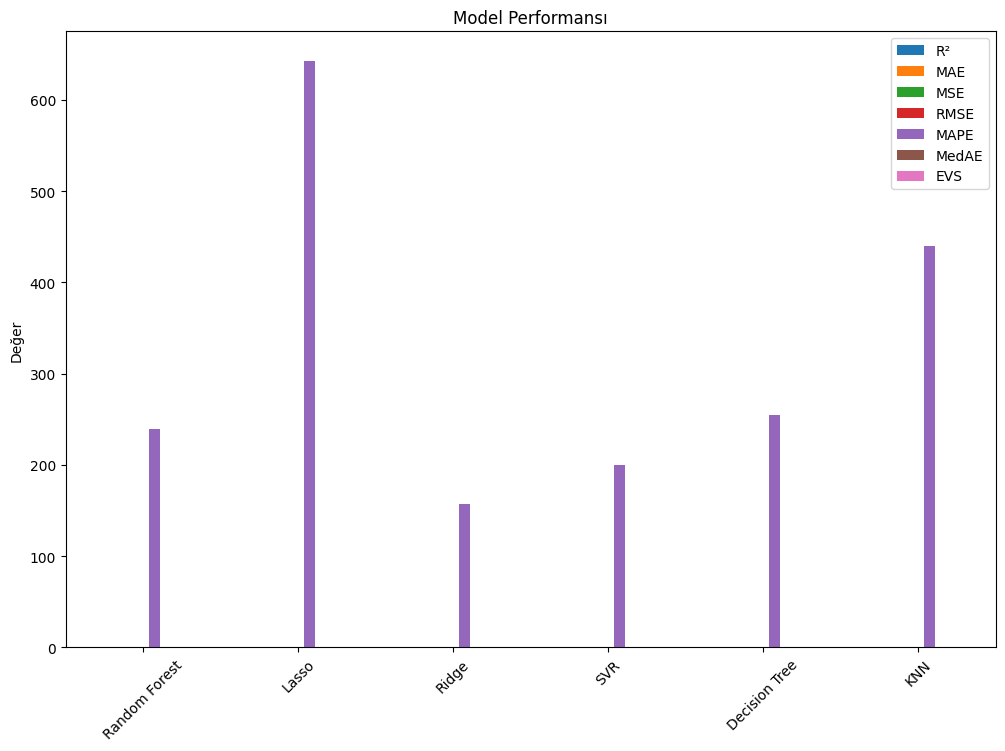

/var/folders/1g/26c8dzf55_n_3hmh6wm8s6nh0000gn/T/ipykernel_4223/519522496.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances, y=features, palette="coolwarm")


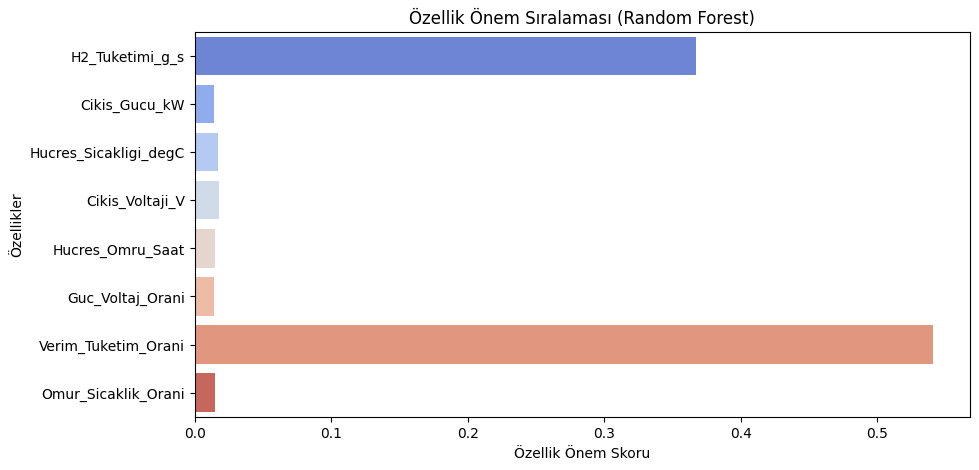

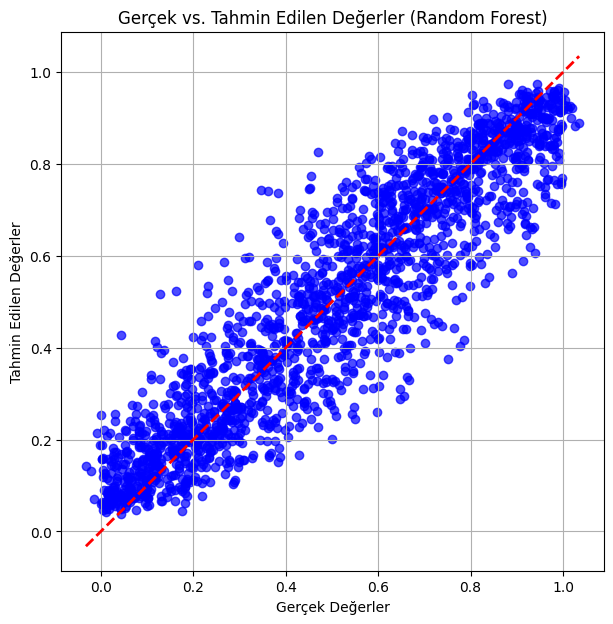

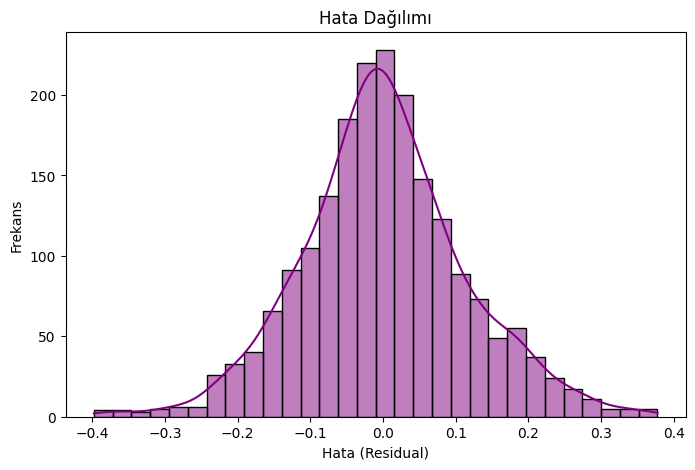

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, min_samples_split=5, n_es

In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, median_absolute_error,
                             r2_score, explained_variance_score)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Veri Setini Yükleme
file_path = "/Users/burakbozoglu/Desktop/hidrojen_motoru_veri_seti_adjusted.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Sütun Adlarını Temizleme
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Eksik Veri Kontrolü
print("Eksik Veri Sayısı:\n", df.isnull().sum())

target_column = "Yakit_Hucresi_Verimi_percent"
if target_column not in df.columns:
    raise ValueError(f"'{target_column}' sütunu veri setinde bulunamadı!")

X = df.drop(columns=[target_column])
y = df[target_column]

# Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi Ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modellerin Eğitilmesi
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=0.1),
    'SVR': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R²": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAPE": np.mean(np.abs((y_test - y_pred) / y_test)) * 100,
        "MedAE": median_absolute_error(y_test, y_pred),
        "EVS": explained_variance_score(y_test, y_pred)
    }

# Sonuçları Yazdırma
for name, metrics in results.items():
    print(f"\n{name} Modeli Sonuçları:")
    for metric, value in metrics.items():
        print(f"✅ {metric}: {value:.4f}")

# Model Performansı Görselleştirme
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(12, 8), title="Model Performansı")
plt.xticks(rotation=45)
plt.ylabel("Değer")
plt.show()

# Özellik Önem Skorları (Random Forest)
rf_model = models['Random Forest']
rf_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=rf_importances, y=features, palette="coolwarm")
plt.xlabel("Özellik Önem Skoru")
plt.ylabel("Özellikler")
plt.title("Özellik Önem Sıralaması (Random Forest)")
plt.show()

# Gerçek vs. Tahmin Grafiği
plt.figure(figsize=(7, 7))
plt.scatter(y_test, rf_model.predict(X_test), alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red", linewidth=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs. Tahmin Edilen Değerler (Random Forest)")
plt.grid()
plt.show()

# Hata Dağılımı Grafiği
residuals = y_test - rf_model.predict(X_test)
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.xlabel("Hata (Residual)")
plt.ylabel("Frekans")
plt.title("Hata Dağılımı")
plt.show()

# Hiperparametre Optimizasyonu (GridSearchCV - Random Forest)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("\nEn İyi Parametreler:", grid_search.best_params_)

# En İyi Model ile Performans Değerlendirme
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("\nEn İyi Model Sonuçları:")
print(f"✅ R² Skoru: {r2_score(y_test, y_pred_best):.4f}")
print(f"✅ MAE: {mean_absolute_error(y_test, y_pred_best):.4f}")
print(f"✅ MSE: {mean_squared_error(y_test, y_pred_best):.4f}")
print(f"✅ RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.4f}")
print(f"✅ MAPE: {np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100:.2f}%")
print(f"✅ MedAE: {median_absolute_error(y_test, y_pred_best):.4f}")
print(f"✅ EVS: {explained_variance_score(y_test, y_pred_best):.4f}")

# Cross-validation ile Değerlendirme
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"\nCross-validation MSE Scores: {-cv_scores}")
print(f"Mean Cross-validation MSE: {-cv_scores.mean()}")

